The best model trained so far is stored in __checkpoints/best.model__.
We can print out its structure by running an utility script:

In [10]:
%run model_inspector.py best

Input size:	2
Hidden size:	100
Depth:		1
Output size:	2
Bidirectional:	True


__Input size__ hints how many input series the network receives (Heart Rate & Mean Blood Pressure).

__Hidden size__ is the number of neurons in each gate of GRU as well as number of neurons in softmax layer.

__Depth__ describes how many times GRU cells are stacked on top of each other.

__Output size__ is always 2 due to fact that the networks are binary classifiers.

__Bidirectional__ informs whether the network is a bidirectional RNN variation.

In order to test the quality of the model another utility script is going to be run:

In [2]:
%run tester.py best

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:26<00:00,  1.18it/s]


When it is done __csv/best_test.csv__ file is created. It contains classified series generated by the model for every patient from the test dataset.

They can be viewed by running the code below:

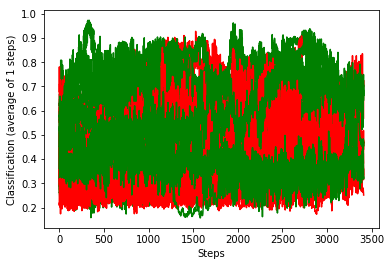

<Figure size 432x288 with 0 Axes>

In [3]:
%matplotlib inline
%run visualize.py csv/best_test.csv 1

The green signals are the series that should be classified as synkope. We are interested in seeing if a series reaches a certain value (threshold), if it does such a signal indicates fainting. In order to see more smoothing can be applied:

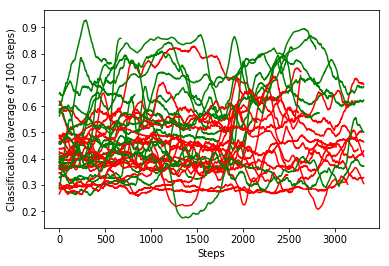

<Figure size 432x288 with 0 Axes>

In [4]:
%matplotlib inline
%run visualize.py csv/best_test.csv 100

It is quite obvious now that the green signals reach higher values than red ones therefore are more likely to be classified as synkope.

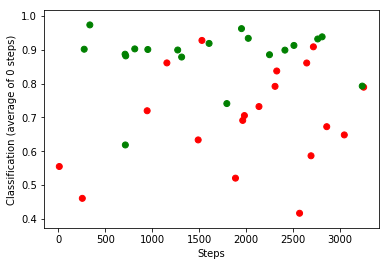

In [5]:
%matplotlib inline
%run visualize.py csv/best_test.csv 0

The scatter plot shows the location of the maximal points of the previous series.

The classification task of synkope depends on choosing the threshold. The threshold is the location a horizontal line that best separates these two types of points. In order to find the best possible threshold the confusion matrix is being used:

100%|████████████████████████████████████████████████████████████████████████████████| 198/198 [01:01<00:00,  1.95it/s]



TP = 16	FP = 2
FN = 3	TN = 17
errorRate = 0.13157894759695288
sensitivity = 0.8421052627146814
specificity = 0.894736841634349
PPV = 0.8888888883950616
NPV = 0.3999999992

accuracy = 0.8684210524030471
F1 = 0.8648648594010226

Best threshold: 0.865



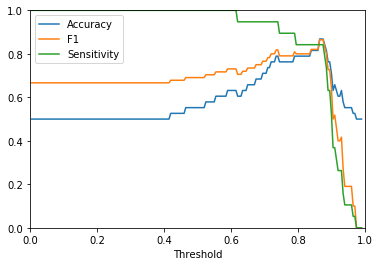

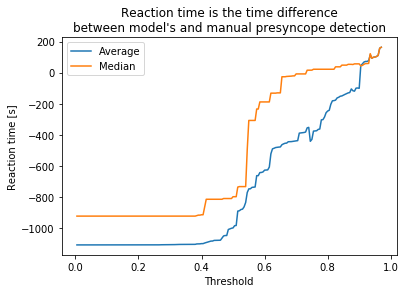

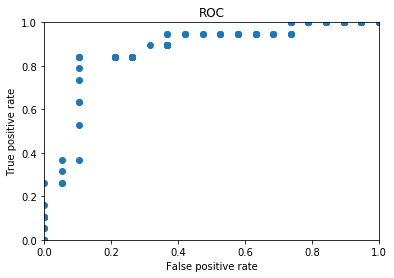

In [2]:
%matplotlib inline
%run conf_matrix.py csv/best_test.csv

We can see that the "best" threshold is __0.865__. It can be tested further by running:

In [7]:
%run conf_matrix.py csv/best_test.csv 0.865

data_id		time_diff


  0%|                                                                                          | 0/198 [00:00<?, ?it/s]

K596		56.719970703125
K147		53.739990234375
K248		-1843.25
K399		71.969970703125
K589		48.52001953125
K106		44.75
K261		53.6500244140625
K258		117.830078125
K201		29.25
K543		-472.4100341796875
K158		-538.159912109375
K606		57.9000244140625
K658		213.8900146484375
K393		43.1199951171875
K409		104.93994140625
AVERAGE		-130.5026611328125
MEDIAN		53.6500244140625



TP = 16	FP = 2
FN = 3	TN = 17
errorRate = 0.13157894759695288
sensitivity = 0.8421052627146814
specificity = 0.894736841634349
PPV = 0.8888888883950616
NPV = 0.3999999992

accuracy = 0.8684210524030471
F1 = 0.8648648594010226

Best threshold: 0.865



Even though the "best" threshold yields the highest classification accuracy, the reaction time is not satisfying. For average patient the model would detect presynkope state __53s__ after it would be detected by a technician with probability __0.87__.

We can try to improve the reaction time at cost of losing accuracy:

In [8]:
%run conf_matrix.py csv/best_test.csv 0.72

data_id		time_diff


  0%|                                                                                          | 0/198 [00:00<?, ?it/s]

K596		22.0
K147		51.5899658203125
K248		-2284.4199829101562
K399		28.6199951171875
K589		36.820068359375
K106		30.0999755859375
K261		49.66998291015625
K258		-38.219970703125
K201		-575.8900146484375
K543		-673.27001953125
K158		-1377.8800048828125
K460		1003.3798828125
K606		-669.8099975585938
K658		50.6400146484375
K393		-113.33001708984375
K409		-1731.780029296875
AVERAGE		-386.9862594604492
MEDIAN		-8.1099853515625



TP = 18	FP = 8
FN = 1	TN = 11
errorRate = 0.23684210546398898
sensitivity = 0.9473684205540166
specificity = 0.5789473681163435
PPV = 0.6923076920414201
NPV = 0.8888888879012344

accuracy = 0.763157894536011
F1 = 0.7999999947654322

Best threshold: 0.72



By choosing threshold value 0.72 arbitrary we can detect fainting about __8s__ before technician with confidence __0.76__.

Another important factor is how often patients who are going to faint are classified as synkope. We can obtain this probability from __sensitivity__ field. We can notice that for the "best" threshold it is merely __0.84__, but for previous arbitraty selected one it reaches __0.95__.

In summary we can get faster reaction time and confidence when classifying patients as prone to synkope by reducing threshold. Threshold reduction on the other hand causes more patients not prone to fainting to be classified otherwise and decreases overall predictive accuracy of the model.